In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Attrition in an Organization || Why Workers Quit?

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

    Expensive in terms of both money and time to train new employees.
    Loss of experienced employees
    Impact in productivity
    Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.
Business questions to brainstorm:

    What factors are contributing more to employee attrition?
    What type of measures should the company take in order to retain their employees?
    What business value does the model bring?
    Will the model save lots of money?
    Which business unit faces the attrition problem?



In [3]:
df = pd.read_csv('HR_Employee_Attrition_Dataset.csv')

In [4]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
for column in df.columns:
    print(f"{column}: valores únicos {df[column].nunique()}")
    print("===========================================")

EmployeeNumber: valores únicos 2940
Attrition: valores únicos 2
Age: valores únicos 43
BusinessTravel: valores únicos 3
DailyRate: valores únicos 886
Department: valores únicos 3
DistanceFromHome: valores únicos 29
Education: valores únicos 5
EducationField: valores únicos 6
EmployeeCount: valores únicos 1
EnvironmentSatisfaction: valores únicos 4
Gender: valores únicos 2
HourlyRate: valores únicos 71
JobInvolvement: valores únicos 4
JobLevel: valores únicos 5
JobRole: valores únicos 9
JobSatisfaction: valores únicos 4
MaritalStatus: valores únicos 3
MonthlyIncome: valores únicos 1349
MonthlyRate: valores únicos 1427
NumCompaniesWorked: valores únicos 10
Over18: valores únicos 1
OverTime: valores únicos 2
PercentSalaryHike: valores únicos 15
PerformanceRating: valores únicos 2
RelationshipSatisfaction: valores únicos 4
StandardHours: valores únicos 1
StockOptionLevel: valores únicos 4
TotalWorkingYears: valores únicos 40
TrainingTimesLastYear: valores únicos 7
WorkLifeBalance: valores 

In [7]:
#Remover features com valores únicos = 1
unicos = [a for a in df.columns if df[a].nunique() == 1]
unicos

['EmployeeCount', 'Over18', 'StandardHours']

In [8]:
df.drop(unicos,axis=1, inplace=True)

In [9]:
df.dtypes.value_counts()

int64     24
object     8
dtype: int64

In [10]:
#Verificar se há dados faltantes
df.isnull().any().sum()

0

# Processing the dataframe

In [11]:
df2 = df.copy()

In [12]:
#Tornando objetos em variáveis categóricas
df2.loc[:, df2.select_dtypes(include = ['object']).columns] = df2.select_dtypes(include=['object']).astype('category')

In [13]:
categoricos = df2.select_dtypes(include=['category'])

In [14]:
#Analisar apena features categoricos

for column in categoricos.columns:
    print(f"{column}: valores únicos {categoricos[column].nunique()}")
    print("===========================================")

Attrition: valores únicos 2
BusinessTravel: valores únicos 3
Department: valores únicos 3
EducationField: valores únicos 6
Gender: valores únicos 2
JobRole: valores únicos 9
MaritalStatus: valores únicos 3
OverTime: valores únicos 2


In [15]:
#Tornar variável categórica, numérica

for c in categoricos.columns:
    df2[c] = df2[c].cat.codes

In [16]:
df2.head(3)

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,41,2,1102,2,1,2,1,2,...,3,1,0,8,0,1,6,4,0,5
1,2,0,49,1,279,1,8,1,1,3,...,4,4,1,10,3,3,10,7,1,7
2,3,1,37,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0


In [17]:
#Avaliar correlação de Pearson das features numéricas utilizando o plotly

data = [
    go.Heatmap(
        z= df2.astype(float).corr().values,
        x=df2.columns.values,
        y=df2.columns.values,
        colorscale='RdYlGn',
        reversescale = False,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=32),
    yaxis = dict(ticks='', nticks=32 ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')


NameError: name 'go' is not defined

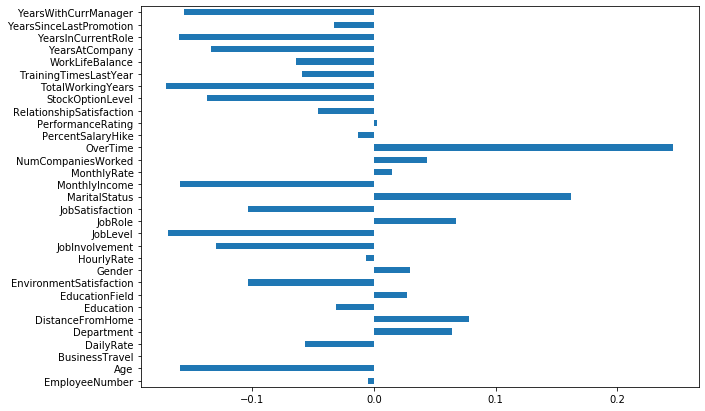

In [18]:
# Outra forma de ver a correlação acima, da variável Attrition com as demais:

df2.drop('Attrition', axis=1).corrwith(df2.Attrition).plot(kind='barh', figsize=(10, 7))

In [19]:
#Deixando apenas features com correlação(R):  R <=-10  ou R >= 10
melhores = df2.corr().where(((df2.corr().values >.10) | (df2.corr().values < -.10))).Attrition.dropna().keys()

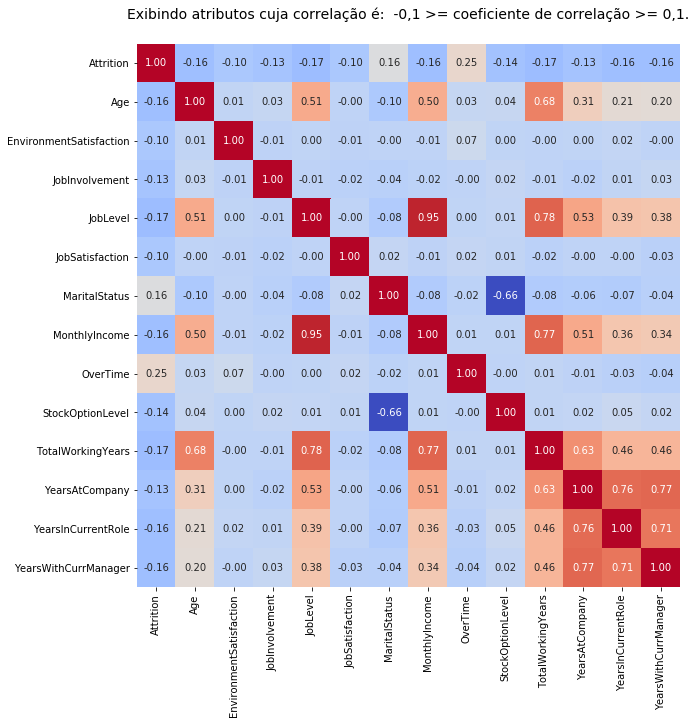

In [20]:
f, ax = plt.subplots(figsize = (10,10))

sns.heatmap(df2[melhores].corr(), fmt='.2f',
            annot=True, yticklabels=True, cmap='coolwarm', ax = ax, cbar=False, square=True)
ax.set_title('Exibindo atributos cuja correlação é:  -0,1 >= coeficiente de correlação >= 0,1.', fontsize = 14, pad = 25)
plt.setp(ax.get_xticklabels(), fontsize=10, fontweight= None, horizontalalignment="center");

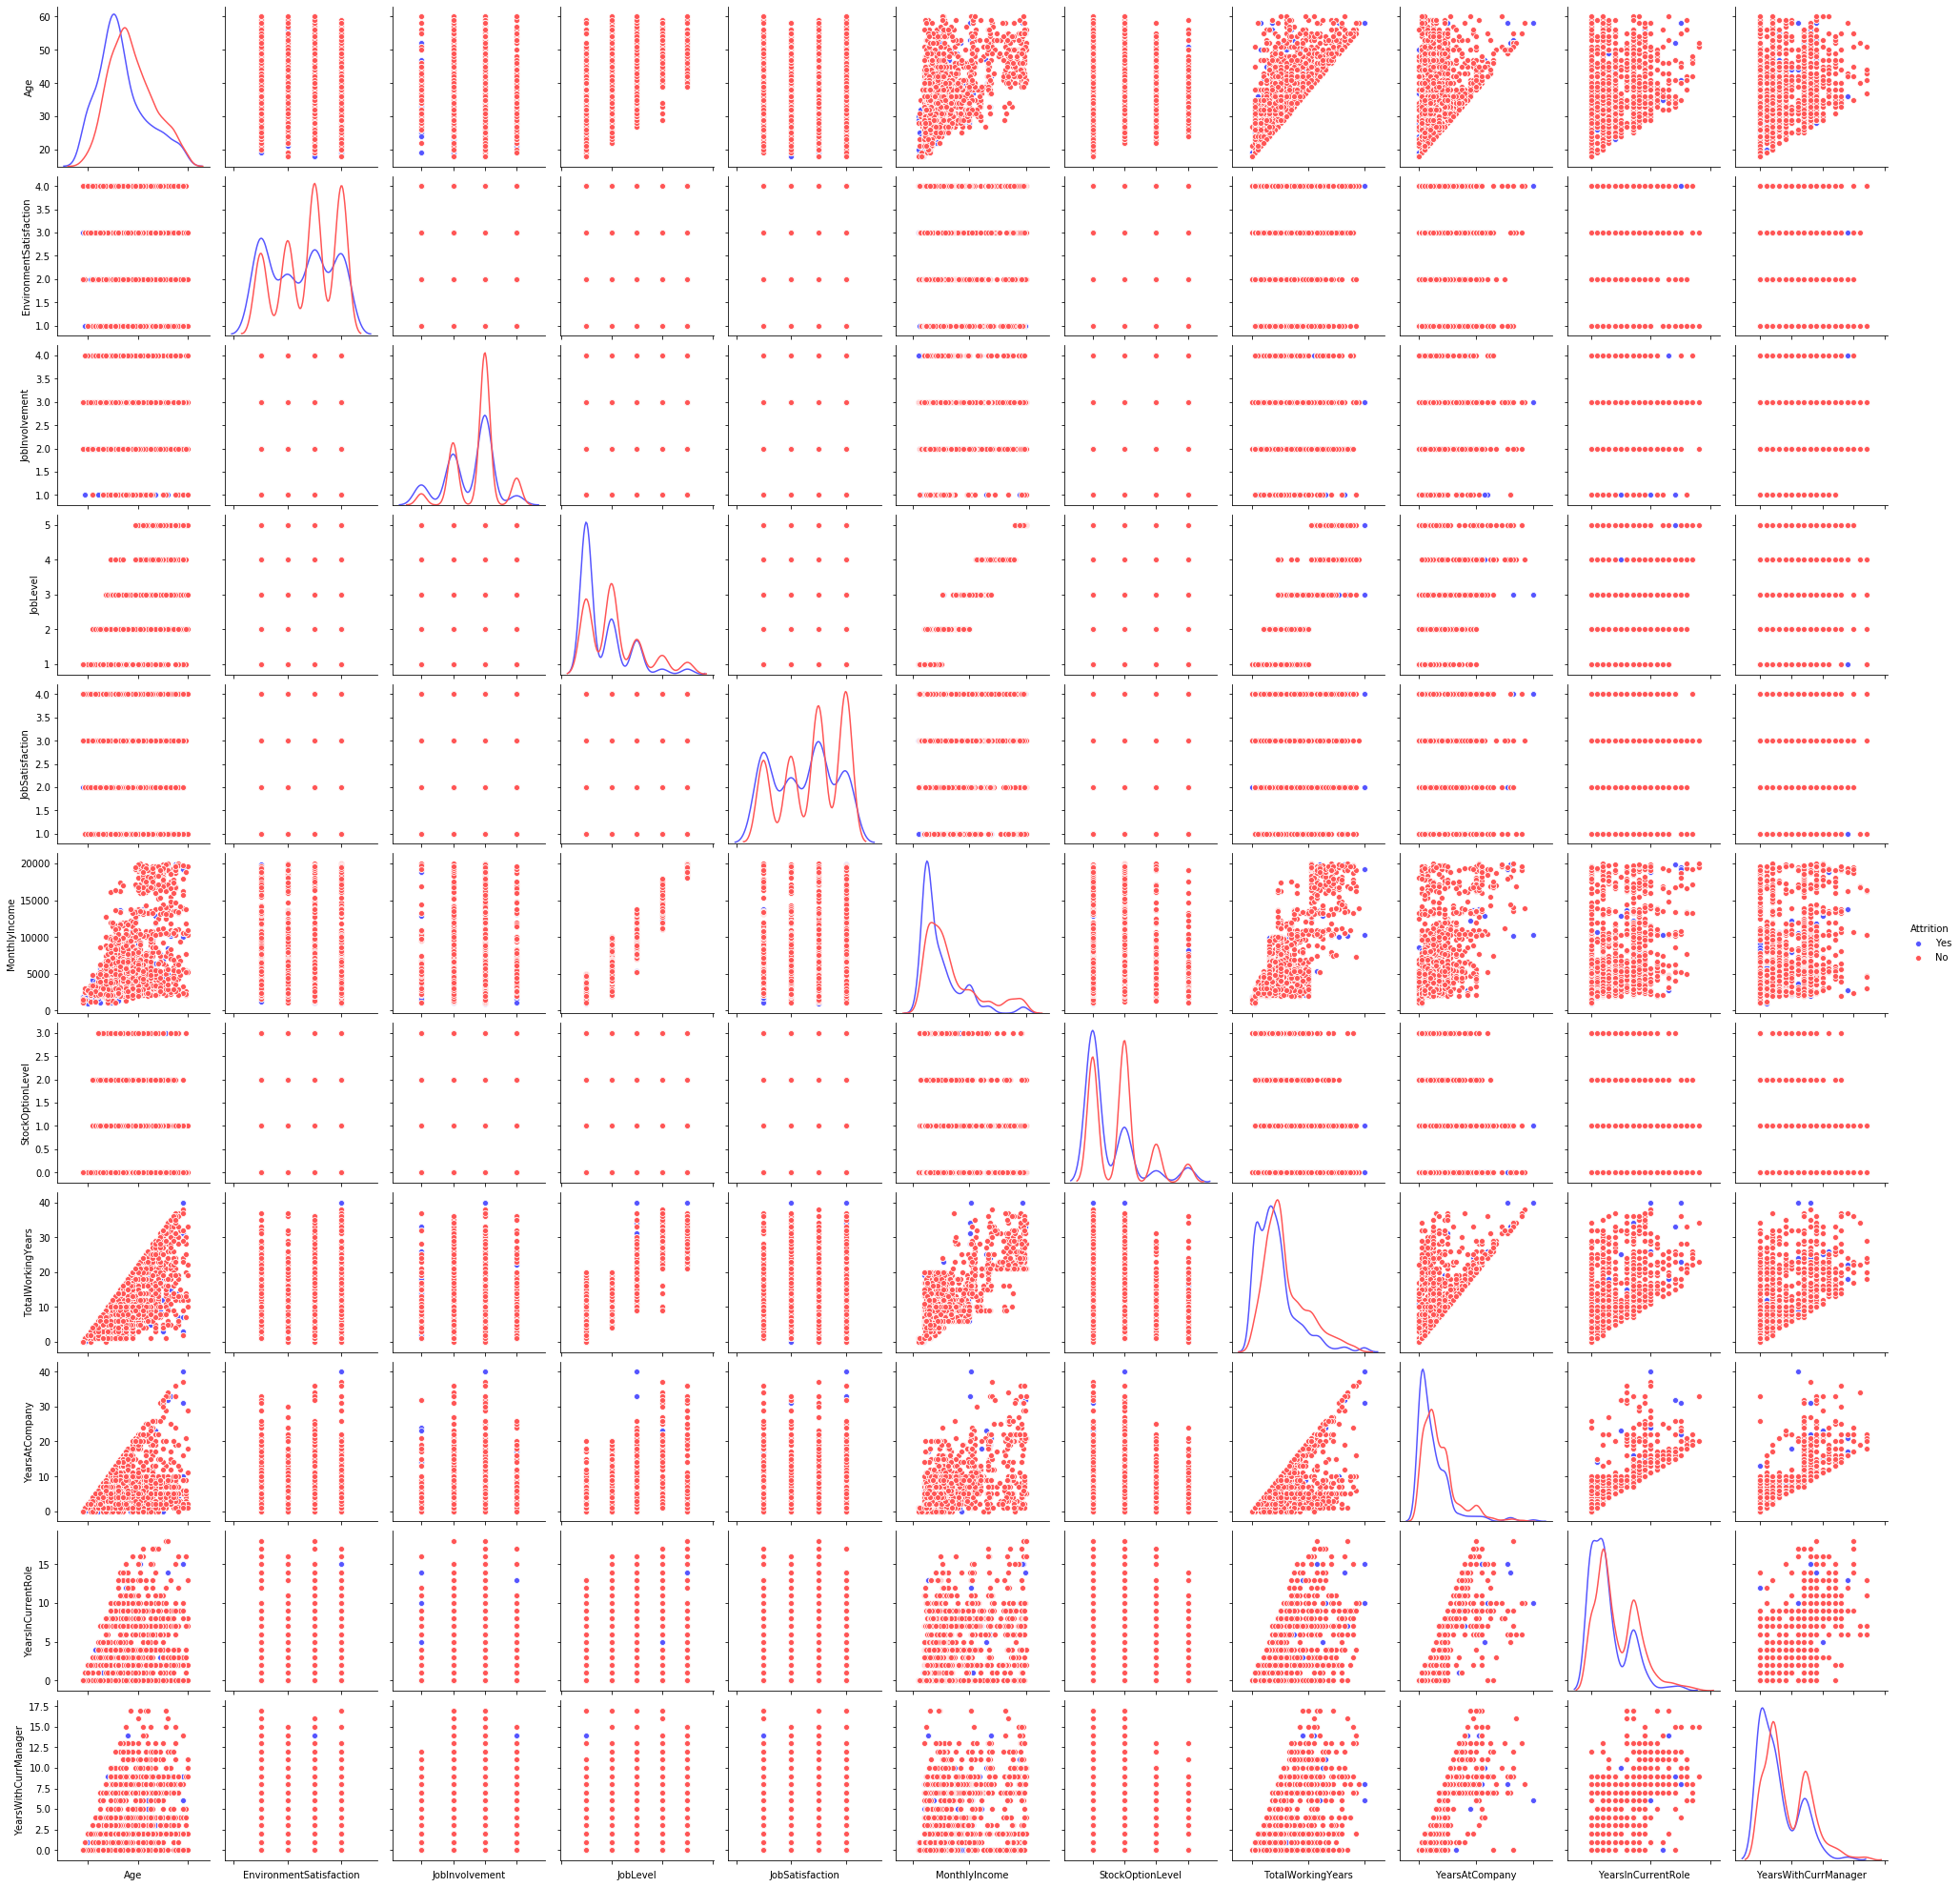

In [21]:
#Analisar pairplot das melhores features

g = sns.pairplot(df[melhores], hue='Attrition', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=False))
g.set(xticklabels=[])

# Get Dummies

In [22]:
#Agora, vamos nos repotar ao DataFrame original (df), utilizando apenas as melhores features já selecionadas, 
#transformando as categóricas em dummies

In [23]:
melhores

Index(['Attrition', 'Age', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [24]:
df = df[melhores]

In [25]:
#Features com menos de 10 vlores únicos serão tratados como discretos
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 10]

In [26]:
dummy_col

['EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'StockOptionLevel']

In [27]:
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')

In [28]:
data.head(2)

,Attrition,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,...,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,Yes,41,5993,8,6,4,5,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1,No,49,5130,10,10,7,7,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [29]:
#Convertenso o target booleano, de  categórico para numérico.
target_map = {'Yes':1, 'No':0}
data["Attrition"] = data["Attrition"].apply(lambda x: target_map[x])

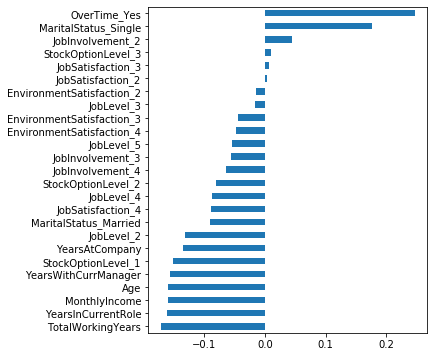

In [30]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(5, 6))

# Modeling

In [31]:
data

,Attrition,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,...,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,1,41,5993,8,6,4,5,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1,0,49,5130,10,10,7,7,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1,37,2090,7,0,0,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
3,0,33,2909,8,8,7,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,27,3468,6,2,2,2,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,36,2571,17,5,2,3,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2936,0,39,9991,9,7,7,7,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2937,0,27,6142,6,6,2,3,1,0,0,...,0,1,0,0,1,0,1,1,0,0
2938,0,49,5390,17,9,6,8,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Attrition                  2940 non-null   int64
 1   Age                        2940 non-null   int64
 2   MonthlyIncome              2940 non-null   int64
 3   TotalWorkingYears          2940 non-null   int64
 4   YearsAtCompany             2940 non-null   int64
 5   YearsInCurrentRole         2940 non-null   int64
 6   YearsWithCurrManager       2940 non-null   int64
 7   EnvironmentSatisfaction_2  2940 non-null   uint8
 8   EnvironmentSatisfaction_3  2940 non-null   uint8
 9   EnvironmentSatisfaction_4  2940 non-null   uint8
 10  JobInvolvement_2           2940 non-null   uint8
 11  JobInvolvement_3           2940 non-null   uint8
 12  JobInvolvement_4           2940 non-null   uint8
 13  JobLevel_2                 2940 non-null   uint8
 14  JobLevel_3              

## Training a Decision Tree Model and Random Forest

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**

In [33]:
from sklearn.model_selection import train_test_split

### Splitting data by training data and test data

In [34]:
X = data.drop('Attrition',axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
predictions = dtree.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       626
           1       0.75      0.82      0.78       109

    accuracy                           0.93       735
   macro avg       0.86      0.88      0.87       735
weighted avg       0.93      0.93      0.93       735



In [41]:
print(confusion_matrix(y_test,predictions))

[[596  30]
 [ 20  89]]


### Importing random forest classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=200)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))

[[616  10]
 [ 26  83]]


In [47]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       626
           1       0.89      0.76      0.82       109

    accuracy                           0.95       735
   macro avg       0.93      0.87      0.90       735
weighted avg       0.95      0.95      0.95       735

